In [1]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (8.0, 10.0)

ImportError: cannot import name 'colors' from 'matplotlib' (unknown location)

In [20]:
dataDir='output'
dataType='val2014'
# annFile='{}/annotations/instances_{}.json'.format(dataDir,dataType)
annFile = "output/annotations.json"

In [3]:
# initialize COCO api for instance annotations
coco=COCO(annFile)

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!


In [5]:
# display COCO categories and supercategories
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(' '.join(nms)))

# nms = set([cat['supercategory'] for cat in cats])
# print('COCO supercategories: \n{}'.format(' '.join(nms)))

COCO categories: 
_background_ clump stalk bar spear straw



In [8]:
# get all images containing given categories, select one at random
catIds = coco.getCatIds(catNms=['clump','stalk','bar','spear','straw']);
imgIds = coco.getImgIds(catIds=catIds );
# imgIds = coco.getImgIds(imgIds = [324158])
imgIds = coco.getImgIds(imgIds = [2])
img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]

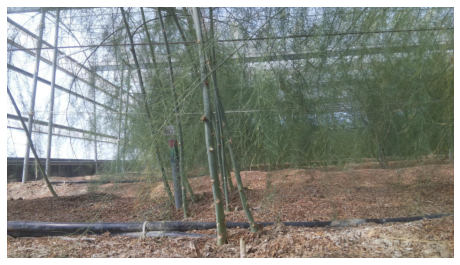

In [13]:
# load and display image
# I = io.imread('%s/images/%s/%s'%(dataDir,dataType,img['file_name']))
# use url to load image
I = io.imread(r"output\JPEGImages\20211102_104055_.jpg")
plt.axis('off')
plt.imshow(I)
plt.show()

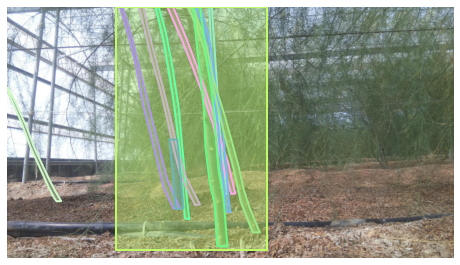

In [14]:
# load and display instance annotations
plt.imshow(I); plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)
coco.showAnns(anns)

In [28]:
# initialize COCO api for person keypoints annotations
# annFile = '{}/annotations/person_keypoints_{}.json'.format(dataDir,dataType)
annFile = r"output\annotations.json"
coco_kps=COCO(annFile)

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!


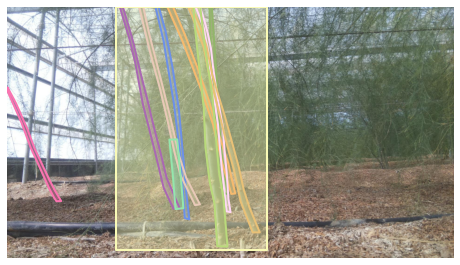

In [29]:
# load and display keypoints annotations
plt.imshow(I); plt.axis('off')
ax = plt.gca()
annIds = coco_kps.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco_kps.loadAnns(annIds)
coco_kps.showAnns(anns)

In [30]:
# initialize COCO api for caption annotations
# annFile = '{}/annotations/captions_{}.json'.format(dataDir,dataType)
annFile = r"output\annotations.json"
coco_caps=COCO(annFile)

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!


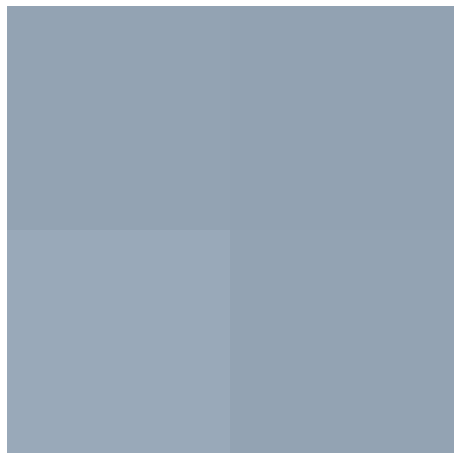

In [31]:
# load and display caption annotations
annIds = coco_caps.getAnnIds(imgIds=img['id']);
anns = coco_caps.loadAnns(annIds)
coco_caps.showAnns(anns)
plt.imshow(I); plt.axis('off'); plt.show()